In [65]:
import csv
import os
import pandas as pd
import numpy as np
import datetime
import re
import seaborn as sns
from matplotlib import *
import matplotlib.pyplot as plt


In [35]:
df = pd.read_csv("imdb.csv")

In [36]:
df

,Unnamed: 0,Name,Directors,Writers,Imdb_rating,score,Genre,Votes,Runtime,Country,Release_date,Budget,Opening_weekend,Gross_USA,Worldwide_gross,Sound_mix,Color,Aspect_ratio,Film_location
0,0,Hababam Sinifi,NaN,NaN,9.3,xxx,"Comedy, Drama",38138,87.0,Turkey,April 1975 (Turkey),NaN,NaN,NaN,NaN,NaN,Color,1.33 : 1,NaN
1,1,The Shawshank Redemption,NaN,NaN,9.3,80,Drama,2391726,142.0,USA,14 October 1994 (USA),"$25,000,000","$727,327,","$28,699,976","$28,817,291",Dolby Digital,Color,1.85 : 1,NaN
2,2,Mirror Game,NaN,NaN,9.2,xxx,"Crime, Mystery, Thriller",23755,147.0,Bangladesh,17 November 2016 (France),"BDT35,000,000",NaN,NaN,NaN,NaN,Color,2.35 : 1,NaN
3,3,The Godfather,NaN,NaN,9.2,100,"Crime, Drama",1657064,175.0,USA,24 March 1972 (USA),"$6,000,000","$302,393,","$134,966,411","$246,120,986",DTS,Color,1.85 : 1,NaN
4,4,Soorarai Pottru,NaN,NaN,9.1,xxx,Drama,70828,153.0,India,12 November 2020 (USA),"INR150,000,000",NaN,NaN,NaN,Dolby Atmos,Color,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13095,13095,Manichitrathazhu,NaN,NaN,8.7,xxx,"Comedy, Horror, Music",9207,169.0,India,24 December 1993 (India),NaN,NaN,NaN,NaN,NaN,Color,NaN,NaN
13096,13096,The Broken Landlord,NaN,NaN,8.7,xxx,"Comedy, Drama",14200,101.0,Turkey,29 June 1989 (Hungary),NaN,NaN,NaN,NaN,NaN,Color,NaN,NaN
13097,13097,Barking at the Stars,NaN,NaN,8.7,xxx,"Comedy, Romance",6888,NaN,Federal Republic of Yugoslavia,1 June 1998 (Federal Republic of Yugoslavia),NaN,NaN,NaN,NaN,Stereo,Color,NaN,NaN
13098,13098,The Lord of the Rings: The Two Towers,NaN,NaN,8.7,87,"Action, Adventure, Drama",1511642,179.0,New Zealand,18 December 2002 (USA),"$94,000,000","$62,007,528,","$342,551,365","$947,495,095",DTS-ES,Color,2.39 : 1,NaN


In [4]:
df.info

<bound method DataFrame.info of        Unnamed: 0                                   Name  Directors  Writers  \
0               0                         Hababam Sinifi        NaN      NaN   
1               1               The Shawshank Redemption        NaN      NaN   
2               2                            Mirror Game        NaN      NaN   
3               3                          The Godfather        NaN      NaN   
4               4                        Soorarai Pottru        NaN      NaN   
...           ...                                    ...        ...      ...   
13095       13095                       Manichitrathazhu        NaN      NaN   
13096       13096                    The Broken Landlord        NaN      NaN   
13097       13097                   Barking at the Stars        NaN      NaN   
13098       13098  The Lord of the Rings: The Two Towers        NaN      NaN   
13099       13099                             The Matrix        NaN      NaN   

       

In [37]:
df.shape

(13100, 19)

In [38]:
df.describe()

,Unnamed: 0,Directors,Writers,Imdb_rating,Votes,Runtime,Film_location
count,13100.000000,0.0,0.0,13100.000000,1.310000e+04,12448.000000,0.0
mean,6549.500000,NaN,NaN,7.449328,1.736895e+05,117.388576,NaN
std,3781.788598,NaN,NaN,0.970395,4.444060e+05,29.860611,NaN
min,0.000000,NaN,NaN,5.900000,5.000000e+03,45.000000,NaN
25%,3274.750000,NaN,NaN,6.600000,8.761500e+03,96.000000,NaN
50%,6549.500000,NaN,NaN,7.300000,1.875350e+04,110.000000,NaN
75%,9824.250000,NaN,NaN,8.400000,7.421650e+04,132.000000,NaN
max,13099.000000,NaN,NaN,9.300000,2.392108e+06,439.000000,NaN


In [39]:
dataFrame = df.drop(['Film_location','Directors','Writers','Unnamed: 0'], axis = 1)

In [40]:
dataFrame.shape

(13100, 15)

In [41]:
dataFrame.describe()

,Imdb_rating,Votes,Runtime
count,13100.000000,1.310000e+04,12448.000000
mean,7.449328,1.736895e+05,117.388576
std,0.970395,4.444060e+05,29.860611
min,5.900000,5.000000e+03,45.000000
25%,6.600000,8.761500e+03,96.000000
50%,7.300000,1.875350e+04,110.000000
75%,8.400000,7.421650e+04,132.000000
max,9.300000,2.392108e+06,439.000000


In [42]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13100 entries, 0 to 13099
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             13100 non-null  object 
 1   Imdb_rating      13100 non-null  float64
 2   score            13100 non-null  object 
 3   Genre            13100 non-null  object 
 4   Votes            13100 non-null  int64  
 5   Runtime          12448 non-null  float64
 6   Country          13100 non-null  object 
 7   Release_date     13091 non-null  object 
 8   Budget           7607 non-null   object 
 9   Opening_weekend  7033 non-null   object 
 10  Gross_USA        7658 non-null   object 
 11  Worldwide_gross  9473 non-null   object 
 12  Sound_mix        10555 non-null  object 
 13  Color            13006 non-null  object 
 14  Aspect_ratio     11341 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 1.5+ MB


In [43]:
dataFrame.fillna('xxx',inplace = True)

In [44]:
dataFrame.head()

,Name,Imdb_rating,score,Genre,Votes,Runtime,Country,Release_date,Budget,Opening_weekend,Gross_USA,Worldwide_gross,Sound_mix,Color,Aspect_ratio
0,Hababam Sinifi,9.3,xxx,"Comedy, Drama",38138,87,Turkey,April 1975 (Turkey),xxx,xxx,xxx,xxx,xxx,Color,1.33 : 1
1,The Shawshank Redemption,9.3,80,Drama,2391726,142,USA,14 October 1994 (USA),"$25,000,000","$727,327,","$28,699,976","$28,817,291",Dolby Digital,Color,1.85 : 1
2,Mirror Game,9.2,xxx,"Crime, Mystery, Thriller",23755,147,Bangladesh,17 November 2016 (France),"BDT35,000,000",xxx,xxx,xxx,xxx,Color,2.35 : 1
3,The Godfather,9.2,100,"Crime, Drama",1657064,175,USA,24 March 1972 (USA),"$6,000,000","$302,393,","$134,966,411","$246,120,986",DTS,Color,1.85 : 1
4,Soorarai Pottru,9.1,xxx,Drama,70828,153,India,12 November 2020 (USA),"INR150,000,000",xxx,xxx,xxx,Dolby Atmos,Color,xxx


In [45]:
dataFrame.score.replace('xxx',0, inplace =True)
dataFrame.Release_date.replace('xxx', 0, inplace= True)
dataFrame.score = dataFrame.score.astype(int)

In [46]:
colonne  =['Budget', 'Opening_weekend', 'Gross_USA','Worldwide_gross']
for i in colonne:
    dataFrame[i] = dataFrame[i].str.replace(',','')
    dataFrame[i] = dataFrame[i].str.replace('xxx','$0')

In [47]:
dataFrame['Release_date'].isna

<bound method Series.isna of 0                                 April 1975 (Turkey)
1                               14 October 1994 (USA)
2                           17 November 2016 (France)
3                                 24 March 1972 (USA)
4                              12 November 2020 (USA)
                             ...                     
13095                        24 December 1993 (India)
13096                          29 June 1989 (Hungary)
13097    1 June 1998 (Federal Republic of Yugoslavia)
13098                          18 December 2002 (USA)
13099                             31 March 1999 (USA)
Name: Release_date, Length: 13100, dtype: object>

In [48]:
dataFrame.head()

,Name,Imdb_rating,score,Genre,Votes,Runtime,Country,Release_date,Budget,Opening_weekend,Gross_USA,Worldwide_gross,Sound_mix,Color,Aspect_ratio
0,Hababam Sinifi,9.3,0,"Comedy, Drama",38138,87,Turkey,April 1975 (Turkey),$0,$0,$0,$0,xxx,Color,1.33 : 1
1,The Shawshank Redemption,9.3,80,Drama,2391726,142,USA,14 October 1994 (USA),$25000000,$727327,$28699976,$28817291,Dolby Digital,Color,1.85 : 1
2,Mirror Game,9.2,0,"Crime, Mystery, Thriller",23755,147,Bangladesh,17 November 2016 (France),BDT35000000,$0,$0,$0,xxx,Color,2.35 : 1
3,The Godfather,9.2,100,"Crime, Drama",1657064,175,USA,24 March 1972 (USA),$6000000,$302393,$134966411,$246120986,DTS,Color,1.85 : 1
4,Soorarai Pottru,9.1,0,Drama,70828,153,India,12 November 2020 (USA),INR150000000,$0,$0,$0,Dolby Atmos,Color,xxx


In [17]:
dataFrame.drop_duplicates(inplace = True)
dataFrame.shape

(10067, 15)

In [18]:
Other_Frame = dataFrame.copy() #Les modifications sur la data ou les indices de copy ne sera pas reflété sur l'object original 

In [19]:
Other_Frame[['Date_release','Country_release']] = Other_Frame['Release_date'].str.split('(', expand = True)
Other_Frame.head()

,Name,Imdb_rating,score,Genre,Votes,Runtime,Country,Release_date,Budget,Opening_weekend,Gross_USA,Worldwide_gross,Sound_mix,Color,Aspect_ratio,Date_release,Country_release
0,Hababam Sinifi,9.3,0,"Comedy, Drama",38138,87,Turkey,April 1975 (Turkey),$0,$0,$0,$0,xxx,Color,1.33 : 1,April 1975,Turkey)
1,The Shawshank Redemption,9.3,80,Drama,2391726,142,USA,14 October 1994 (USA),$25000000,$727327,$28699976,$28817291,Dolby Digital,Color,1.85 : 1,14 October 1994,USA)
2,Mirror Game,9.2,0,"Crime, Mystery, Thriller",23755,147,Bangladesh,17 November 2016 (France),BDT35000000,$0,$0,$0,xxx,Color,2.35 : 1,17 November 2016,France)
3,The Godfather,9.2,100,"Crime, Drama",1657064,175,USA,24 March 1972 (USA),$6000000,$302393,$134966411,$246120986,DTS,Color,1.85 : 1,24 March 1972,USA)
4,Soorarai Pottru,9.1,0,Drama,70828,153,India,12 November 2020 (USA),INR150000000,$0,$0,$0,Dolby Atmos,Color,xxx,12 November 2020,USA)


In [20]:
Other_Frame['Release_date']=pd.to_datetime(Other_Frame['Date_release'],infer_datetime_format=True)
Other_Frame['Year_release'] = Other_Frame['Release_date'].dt.year
Other_Frame['Month_release'] = Other_Frame['Release_date'].dt.month
Other_Frame['Day_release'] = Other_Frame['Release_date'].dt.day

In [21]:
Other_Frame.head()

,Name,Imdb_rating,score,Genre,Votes,Runtime,Country,Release_date,Budget,Opening_weekend,Gross_USA,Worldwide_gross,Sound_mix,Color,Aspect_ratio,Date_release,Country_release,Year_release,Month_release,Day_release
0,Hababam Sinifi,9.3,0,"Comedy, Drama",38138,87,Turkey,1975-04-01,$0,$0,$0,$0,xxx,Color,1.33 : 1,April 1975,Turkey),1975.0,4.0,1.0
1,The Shawshank Redemption,9.3,80,Drama,2391726,142,USA,1994-10-14,$25000000,$727327,$28699976,$28817291,Dolby Digital,Color,1.85 : 1,14 October 1994,USA),1994.0,10.0,14.0
2,Mirror Game,9.2,0,"Crime, Mystery, Thriller",23755,147,Bangladesh,2016-11-17,BDT35000000,$0,$0,$0,xxx,Color,2.35 : 1,17 November 2016,France),2016.0,11.0,17.0
3,The Godfather,9.2,100,"Crime, Drama",1657064,175,USA,1972-03-24,$6000000,$302393,$134966411,$246120986,DTS,Color,1.85 : 1,24 March 1972,USA),1972.0,3.0,24.0
4,Soorarai Pottru,9.1,0,Drama,70828,153,India,2020-11-12,INR150000000,$0,$0,$0,Dolby Atmos,Color,xxx,12 November 2020,USA),2020.0,11.0,12.0


In [49]:
Other_Frame['Currencies'] = Other_Frame['Budget'].str.replace('\d+', '') #Correspond à n'importe quel caractère numérique ; équivalent à la classe [0-9]
Other_Frame.head()

,Name,Imdb_rating,score,Genre,Votes,Runtime,Country,Release_date,Budget,Opening_weekend,...,Worldwide_gross,Sound_mix,Color,Aspect_ratio,Date_release,Country_release,Year_release,Month_release,Day_release,Currencies
0,Hababam Sinifi,9.3,0,"Comedy, Drama",38138,87,Turkey,1975-04-01,$0,$0,...,$0,xxx,Color,1.33 : 1,April 1975,Turkey),1975.0,4.0,1.0,$
1,The Shawshank Redemption,9.3,80,Drama,2391726,142,USA,1994-10-14,$25000000,$727327,...,$28817291,Dolby Digital,Color,1.85 : 1,14 October 1994,USA),1994.0,10.0,14.0,$
2,Mirror Game,9.2,0,"Crime, Mystery, Thriller",23755,147,Bangladesh,2016-11-17,BDT35000000,$0,...,$0,xxx,Color,2.35 : 1,17 November 2016,France),2016.0,11.0,17.0,BDT
3,The Godfather,9.2,100,"Crime, Drama",1657064,175,USA,1972-03-24,$6000000,$302393,...,$246120986,DTS,Color,1.85 : 1,24 March 1972,USA),1972.0,3.0,24.0,$
4,Soorarai Pottru,9.1,0,Drama,70828,153,India,2020-11-12,INR150000000,$0,...,$0,Dolby Atmos,Color,xxx,12 November 2020,USA),2020.0,11.0,12.0,INR


In [50]:
Other_Frame.groupby('Currencies')[['Country']].count()
USA_Frame = Other_Frame.copy()
USA_Frame.drop(USA_Frame.loc[USA_Frame['Currencies'] != '$'].index, inplace = True)
USA_Frame.head()

,Name,Imdb_rating,score,Genre,Votes,Runtime,Country,Release_date,Budget,Opening_weekend,...,Worldwide_gross,Sound_mix,Color,Aspect_ratio,Date_release,Country_release,Year_release,Month_release,Day_release,Currencies
0,Hababam Sinifi,9.3,0,"Comedy, Drama",38138,87,Turkey,1975-04-01,$0,$0,...,$0,xxx,Color,1.33 : 1,April 1975,Turkey),1975.0,4.0,1.0,$
1,The Shawshank Redemption,9.3,80,Drama,2391726,142,USA,1994-10-14,$25000000,$727327,...,$28817291,Dolby Digital,Color,1.85 : 1,14 October 1994,USA),1994.0,10.0,14.0,$
3,The Godfather,9.2,100,"Crime, Drama",1657064,175,USA,1972-03-24,$6000000,$302393,...,$246120986,DTS,Color,1.85 : 1,24 March 1972,USA),1972.0,3.0,24.0,$
6,C/o Kancharapalem,9.0,0,Drama,5146,152,India,2018-09-06,$0,$0,...,$0,xxx,Color,xxx,6 September 2018,USA),2018.0,9.0,6.0,$
8,Natsamrat,9.0,0,"Drama, Family",5639,xxx,India,2016-01-01,$0,$0,...,$633,xxx,Color,xxx,1 January 2016,India),2016.0,1.0,1.0,$


In [51]:
USA_Frame.columns

Index(['Name', 'Imdb_rating', 'score', 'Genre', 'Votes', 'Runtime', 'Country',
       'Release_date', 'Budget', 'Opening_weekend', 'Gross_USA',
       'Worldwide_gross', 'Sound_mix', 'Color', 'Aspect_ratio', 'Date_release',
       'Country_release', 'Year_release', 'Month_release', 'Day_release',
       'Currencies'],
      dtype='object')

In [52]:
def find_Nbre(text):
    Nbre = re.findall(r'[0-9]+',text)
    return " ".join(Nbre)

colonne  =['Budget', 'Opening_weekend', 'Gross_USA','Worldwide_gross']

for i in colonne:
    USA_Frame[i] = USA_Frame[i].apply(lambda x: find_Nbre(x)).values.astype('double')

In [53]:
USA_Frame

,Name,Imdb_rating,score,Genre,Votes,Runtime,Country,Release_date,Budget,Opening_weekend,...,Worldwide_gross,Sound_mix,Color,Aspect_ratio,Date_release,Country_release,Year_release,Month_release,Day_release,Currencies
0,Hababam Sinifi,9.3,0,"Comedy, Drama",38138,87,Turkey,1975-04-01,0.0,0.0,...,0.0,xxx,Color,1.33 : 1,April 1975,Turkey),1975.0,4.0,1.0,$
1,The Shawshank Redemption,9.3,80,Drama,2391726,142,USA,1994-10-14,25000000.0,727327.0,...,28817291.0,Dolby Digital,Color,1.85 : 1,14 October 1994,USA),1994.0,10.0,14.0,$
3,The Godfather,9.2,100,"Crime, Drama",1657064,175,USA,1972-03-24,6000000.0,302393.0,...,246120986.0,DTS,Color,1.85 : 1,24 March 1972,USA),1972.0,3.0,24.0,$
6,C/o Kancharapalem,9.0,0,Drama,5146,152,India,2018-09-06,0.0,0.0,...,0.0,xxx,Color,xxx,6 September 2018,USA),2018.0,9.0,6.0,$
8,Natsamrat,9.0,0,"Drama, Family",5639,xxx,India,2016-01-01,0.0,0.0,...,633.0,xxx,Color,xxx,1 January 2016,India),2016.0,1.0,1.0,$
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12689,Star Wars: Episode V - The Empire Strikes Back,8.7,82,"Action, Adventure, Fantasy",1178261,124,USA,1980-06-20,18000000.0,4910483.0,...,538375067.0,70 mm 6-Track,Color,2.20 : 1,20 June 1980,USA),1980.0,6.0,20.0,$
12690,Nayakan,8.7,0,"Crime, Drama",17124,145,India,1987-10-21,0.0,0.0,...,0.0,xxx,Color,xxx,21 October 1987,India),1987.0,10.0,21.0,$
12691,Goodfellas,8.7,90,"Biography, Crime, Drama",1041996,146,USA,1990-09-21,25000000.0,6368901.0,...,46952991.0,Dolby SR,Color,1.85 : 1,21 September 1990,USA),1990.0,9.0,21.0,$
12692,Thevar Magan,8.7,0,Drama,5863,145,India,1992-10-25,0.0,0.0,...,0.0,xxx,Color,xxx,25 October 1992,India),1992.0,10.0,25.0,$


In [54]:
USA_Frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9129 entries, 0 to 12693
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             9129 non-null   object        
 1   Imdb_rating      9129 non-null   float64       
 2   score            9129 non-null   int32         
 3   Genre            9129 non-null   object        
 4   Votes            9129 non-null   int64         
 5   Runtime          9129 non-null   object        
 6   Country          9129 non-null   object        
 7   Release_date     9120 non-null   datetime64[ns]
 8   Budget           9129 non-null   float64       
 9   Opening_weekend  9129 non-null   float64       
 10  Gross_USA        9129 non-null   float64       
 11  Worldwide_gross  9129 non-null   float64       
 12  Sound_mix        9129 non-null   object        
 13  Color            9129 non-null   object        
 14  Aspect_ratio     9129 non-null   object

### 1. Distribution des films par catégorie

In [75]:
USA_Frame[['Genre1','Genre2','Genre3']] = USA_Frame['Genre'].str.split(',', expand = True)
USA_Frame.head()

,Name,Imdb_rating,score,Genre,Votes,Runtime,Country,Release_date,Budget,Opening_weekend,...,Aspect_ratio,Date_release,Country_release,Year_release,Month_release,Day_release,Currencies,Genre1,Genre2,Genre3
1,The Shawshank Redemption,9.3,80,Drama,2391726,142,USA,1994-10-14,25000000.0,727327.0,...,1.85 : 1,14 October 1994,USA),1994.0,10.0,14.0,$,Drama,None,None
3,The Godfather,9.2,100,"Crime, Drama",1657064,175,USA,1972-03-24,6000000.0,302393.0,...,1.85 : 1,24 March 1972,USA),1972.0,3.0,24.0,$,Crime,Drama,None
8,Natsamrat,9.0,0,"Drama, Family",5639,xxx,India,2016-01-01,0.0,0.0,...,xxx,1 January 2016,India),2016.0,1.0,1.0,$,Drama,Family,None
10,The Dark Knight,9.0,84,"Action, Crime, Drama",2353946,152,USA,2008-07-18,185000000.0,158411483.0,...,2.39 : 1,18 July 2008,USA),2008.0,7.0,18.0,$,Action,Crime,Drama
14,The Godfather: Part II,9.0,90,"Crime, Drama",1152119,202,USA,1974-12-18,13000000.0,171417.0,...,1.85 : 1,18 December 1974,USA),1974.0,12.0,18.0,$,Crime,Drama,None


<AxesSubplot:xlabel='Genre1'>

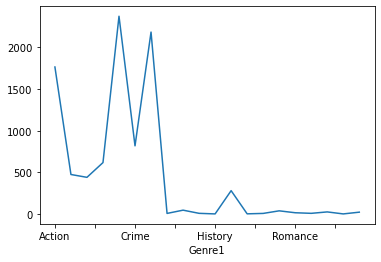

In [56]:
USA_Frame.groupby('Genre1')['Name'].count().plot()

### 2. Top 50 des budgets des films

<ipython-input-57-b7351274d17d>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x,rotation=90)


<Figure size 221040x16848 with 0 Axes>

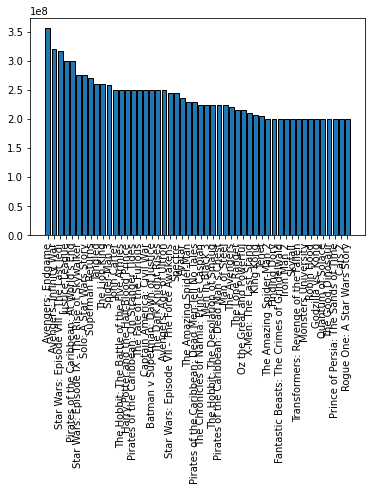

In [57]:
s=USA_Frame.sort_values(by=['Budget'],ascending=False)[:50]
s
# import matplotlib.pyplot as plt
s
fig = plt.figure(987, figsize=(3070, 234))
fig,ax= plt.subplots()
x = s.Name
y = s.Budget
plt.bar(x, y,edgecolor="black")

ax.set_xticklabels(x,rotation=90)
plt.show()

### 3. Top 20 films ayant générés le plus de revenu, le moins de revenu

#### Le plus de revenu

<ipython-input-61-ffdf33b8546a>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x,rotation=90)


<Figure size 221040x168480 with 0 Axes>

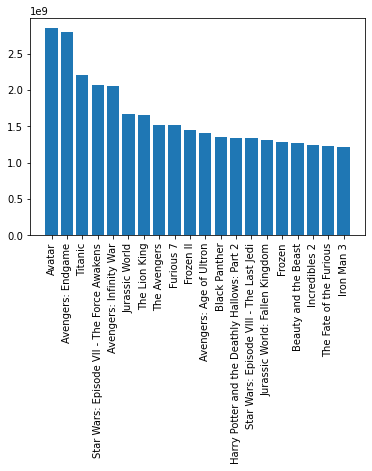

In [61]:
f=USA_Frame.sort_values(by=['Worldwide_gross'],ascending=False)[:20]
f
fig = plt.figure(7, figsize=(3070, 2340))
fig,ax= plt.subplots()
x = f.Name
y = f.Worldwide_gross
plt.bar(x, y)

ax.set_xticklabels(x,rotation=90)

plt.show()


#### Le moins de revenu

<ipython-input-64-52a1837f4fcf>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x,rotation=90)


<Figure size 221040x168480 with 0 Axes>

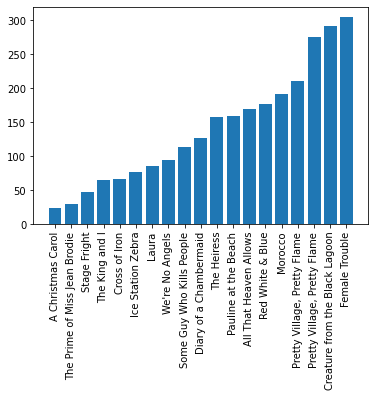

In [64]:
indexNames = USA_Frame[ USA_Frame['Worldwide_gross'] == 0 ].index
# Delete these row indexes from dataFrame
USA_Frame.drop(indexNames , inplace=True)
USA_Frame
# print()
p=USA_Frame.sort_values(by=['Worldwide_gross'])[:20]
p
fig = plt.figure(7, figsize=(3070, 2340))
fig,ax= plt.subplots()
x = p.Name
y = p.Worldwide_gross
plt.bar(x, y)

ax.set_xticklabels(x,rotation=90)

plt.show()

### 4. Distribution des revenus générés par genre de film

<AxesSubplot:xlabel='Genre1'>

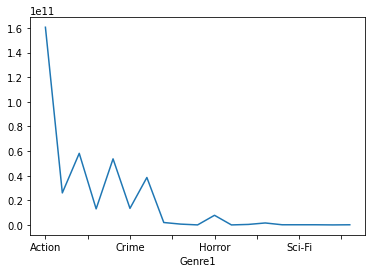

In [106]:
USA_Frame['revenus']=np.array(USA_Frame.Worldwide_gross)-np.array(USA_Frame.Budget)
USA_Frame
p=USA_Frame.groupby('Genre1')['revenus'].sum()
p.plot()

### 7. Top 10 des films par retour sur investissement

<ipython-input-107-6c2db97f7754>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x,rotation=90)


<BarContainer object of 10 artists>

<Figure size 221040x168480 with 0 Axes>

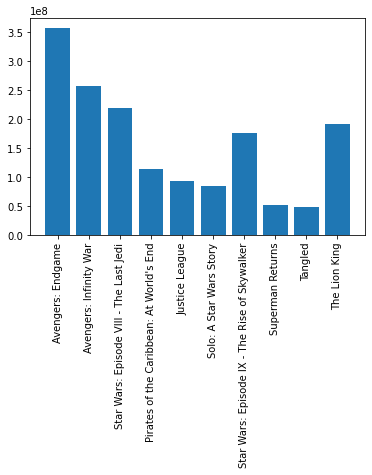

In [107]:
p=USA_Frame.sort_values(by=['Budget'],ascending=False)[:10]
p
fig = plt.figure(7, figsize=(3070, 2340))
fig,ax= plt.subplots()
x = p.Name
y = p.Opening_weekend
ax.set_xticklabels(x,rotation=90)
plt.bar(x, y)

### 8. Note moyenne par année de sortie de film

<AxesSubplot:xlabel='Year_release'>

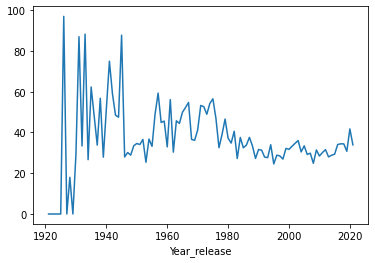

In [113]:
USA_Frame.groupby('Year_release')['score'].mean().plot()